In [10]:
import xarray as xr
import numpy as np

In [4]:
ds_data = xr.open_dataset("data/tasminAdjust_FR-Metro_CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-MF_CNRM-ALADIN64E1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc",
                     engine="netcdf4")

In [9]:
ds_data

<xarray.Dataset> Size: 2GB
Dimensions:         (y: 134, x: 143, nbounds: 4, time: 31411, bnds: 2)
Coordinates:
    lon             (y, x) float64 153kB ...
    lat             (y, x) float64 153kB ...
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 251kB 2015-01-01T12:00:00 ... 2100-...
Dimensions without coordinates: nbounds, bnds
Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB ...
    lat_bnds        (y, x, nbounds) float64 613kB ...
    LambertParisII  int32 4B ...
    tasminAdjust    (time, y, x) float32 2GB ...
    time_bnds       (time, bnds) datetime64[ns] 503kB ...
Attributes: (12/71)
    title:                           CNRM-ALADIN64E1 model output corrected o...
    summary:                         Data were post-processed by the Météo-Fr...
    id:                              hdl:21.14103/d0c607ca-9e9d-4490-9f34-180...
    Conventions:                     CF-1.11 ACDD-1.3
    standard_name_vocabulary:        CF Standard Name Table v81
    input_domain:                    Europe
    ...                              ...
    date_created:                    2025-11-08T06:29:17.012234
    product:                         bias-adjusted output
    license:                         https://cordex.org/data-access/cordex-cm...
    product_version:                 v1
    comment:                         Preliminary data released in the Fall 20...
    keywords:                        temperature, climate, France, minimal ne...

In [35]:
dist_toulouse = np.sqrt((ds_data.lat - 43.6045)**2 + (ds_data.lon - 1.4442)**2)
idx_min = dist_toulouse.argmin()
(ds_data.tasminAdjust[:,idx_min//143, idx_min%143].sel(time=slice(f"{2033-10}", f"{2034+9}"))<273.15).mean()


<xarray.DataArray 'tasminAdjust' ()> Size: 8B
array(0.06988266)
Coordinates:
    lon      float64 8B 1.396
    lat      float64 8B 43.64
    x        float64 8B 5.24e+05
    y        float64 8B 1.849e+06

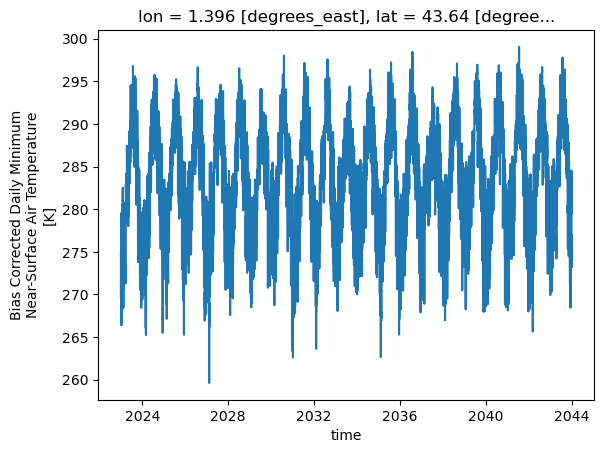

In [36]:
ds_data.tasminAdjust[:,idx_min//143, idx_min%143].sel(time=slice(f"{2033-10}", f"{2034+9}")).plot()

In [ ]:
variable='tasminAdjust'
val_data=ds_data[variable].values
moy_data=np.nanmean(val_data, axis=0) #moyenne temporelle
lats_data=ds_data.lat.values #ou ds_data.latitude.values
lons_data=ds_data.lon.values #ou ds_data.longitude.values

/var/folders/_r/hyspm3rx34nf753l6xwvsrg00000gp/T/ipykernel_8468/601147626.py:3: RuntimeWarning: Mean of empty slice
  moy_data=np.nanmean(val_data,axis=0) #moyenne temporelle


D'après le fichier : https://console.object.files.data.gouv.fr/browser/meteofrance-drias/OUTILS-HACKATHON-2025%2FTRACC%2F    
on peut obtenir les périodes temporelles pour lesquelles ce modèle entre dans les 3 catégories de la TRACC :   
`CMCC-CM2-SR5_ssp370_r1i1p1f1_CNRM-ALADIN64E1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014 2033, 2050, 2072`

Chaque DATE correspond à l’année centrale de la fenêtre temporelle sur laquelle le modèle atteint l’un des niveaux de réchauffement définis dans la TRACC.  
La fenêtre associée est : [DATE − 10 ; DATE + 9].  

In [19]:
print(lats_data.shape)

(134, 143)


In [20]:
print(lons_data.shape)

(134, 143)


In [22]:
print(moy_data.shape)

(134, 143)


In [37]:
# extraire la série temporelle pour Toulouse (43.6045 N, 1.4442 E)
lat_tlse = 43.6045
lon_tlse = 1.4442

In [ ]:
# Boite l'Occitanie
lat_max = 45
lat_min = 42
lon_max = 3.5
lon_min = -1